### Tasks:
* select ROI (Region of Interest)
* ROI of thermal image was converted to a binary image. 
* to enhance the quality of an image, the binary image was then converted to grayscale image using Gaussian filter. 

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

In [19]:
img_folder = '/Users/varun/Desktop/sem6/CV/Project/Images/100FLK07'
bin_folder= '/Users/varun/Desktop/sem6/CV/Project/Images/Binary'
os.makedirs(bin_folder, exist_ok=True)

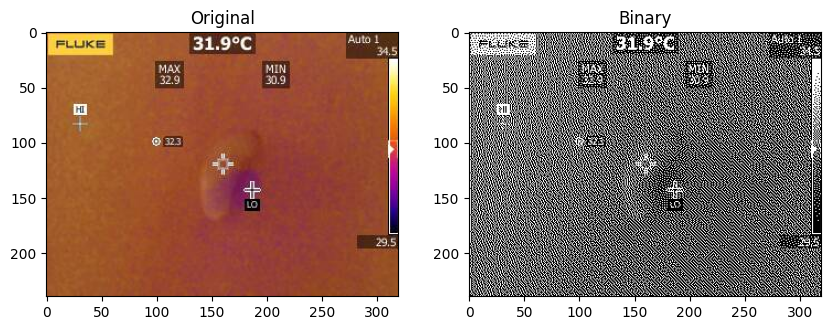

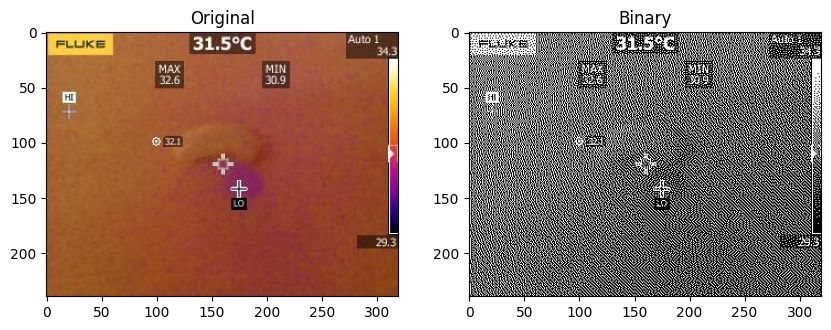

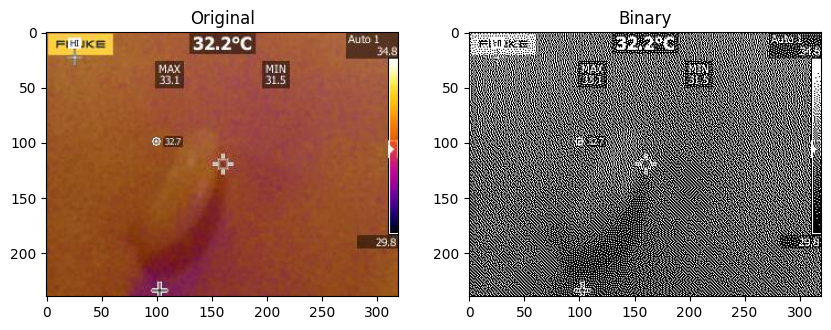

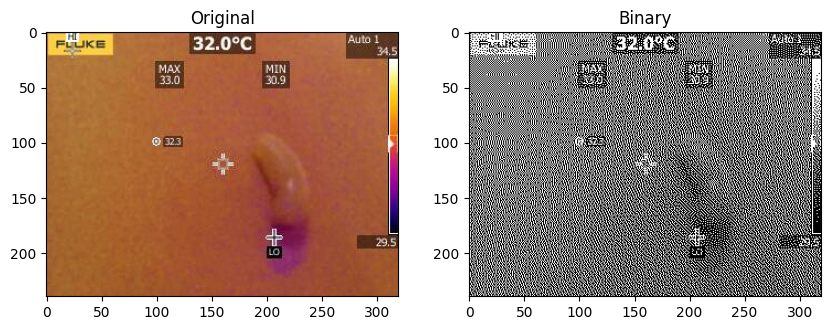

In [20]:
for filename in os.listdir(img_folder):
    if filename.endswith(".JPG"):
        img_path = os.path.join(img_folder, filename)
        image = Image.open(img_path)

        # Convert the image to binary (black and white)
        binary_image = image.convert('1')

        # Save the binary image
        output_path = os.path.join(bin_folder, f"{filename.split('.')[0]}_binary.jpg")
        binary_image.save(output_path)

        # Display the original and binary images side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        axes[0].imshow(image)
        axes[0].set_title("Original")
        axes[1].imshow(binary_image, cmap='gray')
        axes[1].set_title("Binary")
        plt.show()

In [24]:
gray_folder = "/Users/varun/Desktop/sem6/CV/Project/Images/Grayscale"
os.makedirs(gray_folder, exist_ok=True)

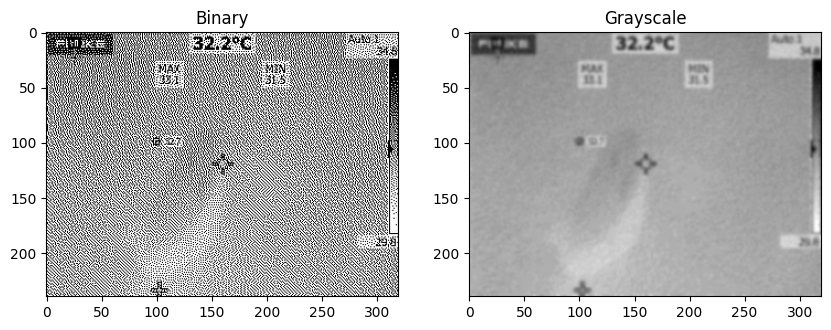

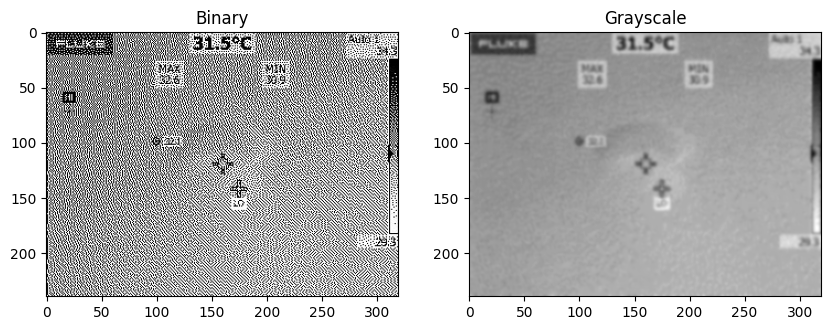

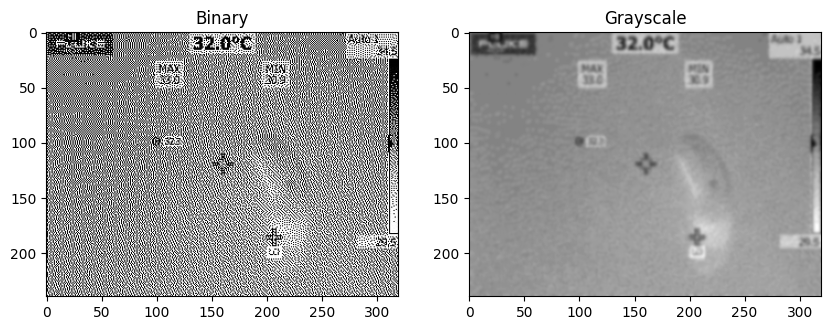

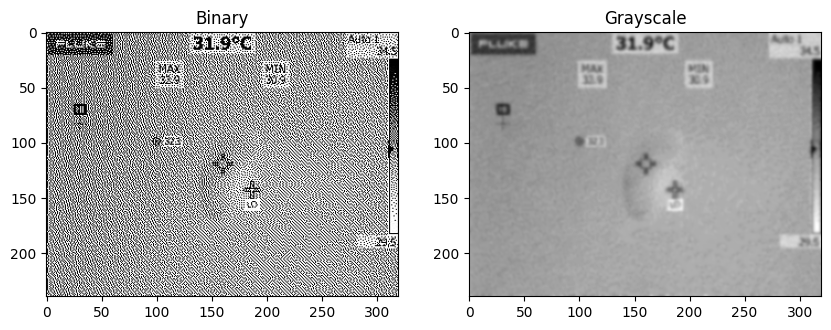

In [34]:
for filename in os.listdir(bin_folder):
    if filename.endswith("_binary.jpg"):
        binary_img_path = os.path.join(bin_folder, filename)
        binary_image = Image.open(binary_img_path)

        # Convert the binary image to a NumPy array
        binary_img_array = 1 - np.array(binary_image) / 255  # Invert binary values
        
        grayscale_image = gaussian_filter(binary_img_array, sigma=1.5)

        output_path = os.path.join(gray_folder, f"IR_{filename.split('_')[1]}_grayscale.jpg")
        Image.fromarray((grayscale_image * 255).astype(np.uint8)).save(output_path)
        
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        axes[0].imshow(binary_img_array, cmap='gray')
        axes[0].set_title("Binary")
        axes[1].imshow(grayscale_image, cmap='gray')
        axes[1].set_title("Grayscale")
        plt.show()
